In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Serie de Fourier Compleja
$$
f[x] = \sum_{k=0}^\infty \gamma_k e^{i \omega k x}
$$

$\omega = \frac{2\pi}{T}$
donde $T$ es el periodo de la onda

In [2]:
# definimos la funcion creando un domain
dx = 0.001
L = np.pi # limite superior e inferior [-pi, pi]
x = L * np.arange(-1, 1+dx, dx)
print("x:",x)

N = len(x) #en este ejemplo en particular definimos x asi
print("using N:",N)

# el periodo seria
T = x[-1] - x[0]
print("T:", T, "= 2 pi")

x: [-3.14159265 -3.13845106 -3.13530947 ...  3.13530947  3.13845106
  3.14159265]
using N: 2001
T: 6.283185307179592 = 2 pi


N/4: 500


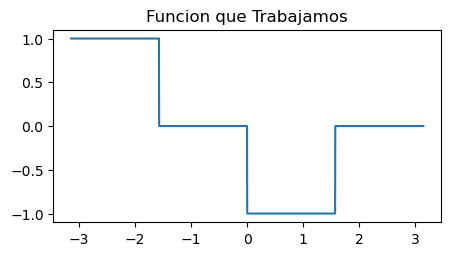

In [16]:
# definir la funcion / Ingresar datos
Nquart = int(np.floor(N/4))
print("N/4:", Nquart)

f = np.zeros_like(x) #crea un arreglo identico a x pero con zeros
f[:Nquart] = 1
f[Nquart:2*Nquart] = 0
f[2*Nquart:3*Nquart] = -1
f[3*Nquart:] = 0


# ------------
fig, ax = plt.subplots(figsize=(5,2.5))
plt.title('Funcion que Trabajamos')
plt.plot(x,f)
plt.show()

## calcular la serie de Fourier

$$
\gamma_k =\frac{1}{T} \int_{t_0}^{t_0+T} f[x) \exp[-i \omega k x) dx
$$

donde $\omega = \frac{2\pi}{T}$

### la integral es discretizable a:
Vease el notebook adjunto `regla_trapezoidal.ipynb`

$h= \frac{T}{N}$

$x=nT/N$

$$
\gamma_k = \frac{1}{T} h \sum_{n=0}^{N-1} y_n \exp[-i \omega k x)
$$

donde ocurre

$-i \omega k x = -i \frac{2\pi}{T} k \frac{n T}{N} = -i 2\pi k n / N $

$ \frac{h}{T} = \frac{1}{N}$

$$
\gamma_k = \frac{1}{N} \sum_{n=0}^{N-1} y_n \exp[-i 2\pi k n / N)
$$

sin embargo la transformada discreta por convencion es sin el facotr 1/N, ese factor va ligado a la transformada inversa (la matematica funciona perfecta cualquiera sea la eleccion):

$$
c_k = N\gamma_k =
\sum_{n=0}^{N-1} y_n \exp[-i 2\pi k n / N)
$$

$$
y_n = \frac{1}{N} \sum_{k=0}^{N-1} c_k \exp[i 2\pi k n / N)
$$

los coeficientes a calcular se guardan como un arreglo
$$ c_k = c[k]$$


In [48]:
# para los 0's complejos se especifica
# y se utilizan solo la mitad positiva, pues para una funcioon real la mitad 
# seran identicos
M = N
c = np.zeros(M, complex)

# omega = 2 * np.pi / T # se puede utilizar la representacion 
# x = nT/N

for k in range(0, M):
    for n in range(0, N):
        c[k] += f[n] * np.exp(-1j * 2*np.pi * k * n / N)


print("c[k]:",c)

c[k]: [   0.        +0.00000000e+00j  638.43500642-6.34936384e+02j
   -0.99998583-5.49501705e-03j ... -210.80348142+2.14307564e+02j
   -0.99998583+5.49501705e-03j  638.43500642+6.34936384e+02j]


## rearmando la funcion

$$
y_n = \frac{1}{N} \sum_{k=0}^{N-1} c_k \exp[i 2\pi k n / N)
$$


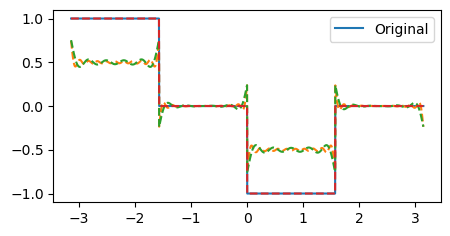

In [71]:
F = np.zeros_like(x, complex)

fig, ax = plt.subplots(figsize=(5,2.5))
plt.plot(x, f, label='Original')


for k in range(0, M):
    for n in range(0, N): # suma interna de todos los puntos
        F[n] += c[k] * np.exp(1j * 2     *np.pi * k * n / N) / N
    
    if ((k % 20  == 0) and k>1950):
        plt.plot(x, F.real, '--')

# F = F/N

plt.legend()
plt.show()

In [72]:
F.real

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
       6.09123862e-13, 6.27331520e-13, 6.82454093e-13])

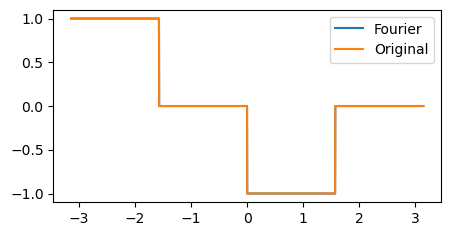

In [73]:
# probando el plot final
fig, ax = plt.subplots(figsize=(5,2.5))
plt.plot(x, F.real, label='Fourier')
plt.plot(x, f, label='Original')
plt.legend()
plt.show()

# PlayGround

x: [-3.14159265 -3.13845106 -3.13530947 ...  3.13530947  3.13845106
  3.14159265]
using N: 2001
T: 6.283185307179592 = 2 pi
N/4: 500


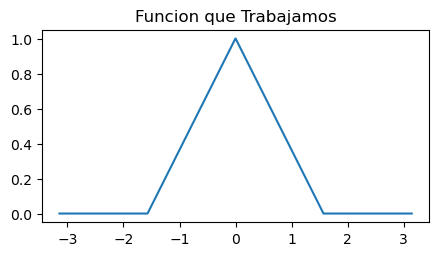

In [75]:
# definimos la funcion creando un domain
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

dx = 0.001
L = np.pi # limite superior e inferior [-pi, pi]
x = L * np.arange(-1, 1+dx, dx)
print("x:",x)

N = len(x)
print("using N:",N)

# el periodo seria
T = x[-1] - x[0]
print("T:", T, "= 2 pi")
#del periodo viene omega que resume la informacion frecuencial


# definir la funcion / Ingresar datos
Nquart = int(np.floor(N/4))
print("N/4:", Nquart)

f = np.zeros_like(x) #crea un arreglo identico a x pero con zeros
# f[:Nquart] = 0 # el primer cuarto tiene 0's y el ultimo
f[Nquart:2*Nquart] = np.linspace(0,1,Nquart)
f[2*Nquart:3*Nquart] = np.linspace(1,0,Nquart)


# ------------ plot de la funcion usada
fig, ax = plt.subplots(figsize=(5,2.5))
plt.title('Funcion que Trabajamos')
plt.plot(x,f)
plt.show()

c[k]: [ 500.        +0.j         -405.54363892-1.27342039j
  203.2465952 +1.2764146j  ...  -45.48393591+0.42847444j
  203.2465952 -1.2764146j  -405.54363892+1.27342039j]


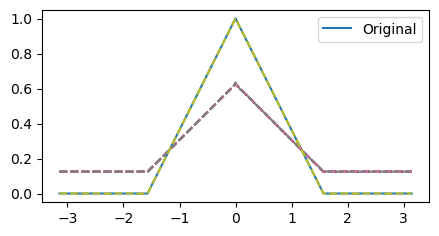

In [77]:
#  resolviendo con regla trapezoidal
M = N
c = np.zeros(M, complex)

# omega = 2 * np.pi / T # se puede utilizar la representacion 
# x = nT/N

for k in range(0, M):
    for n in range(0, N):
        c[k] += f[n] * np.exp(-1j * 2*np.pi * k * n / N)

print("c[k]:",c)


# se realiza el plot con los coeficinetes ---- 
F = np.zeros_like(x, complex)

fig, ax = plt.subplots(figsize=(5,2.5))
plt.plot(x, f, label='Original')


for k in range(0, M):
    for n in range(0, N): # suma interna de todos los puntos
        F[n] += c[k] * np.exp(1j * 2*np.pi * k * n / N) / N
    
    if ((k % 20  == 0) and k>1850):
        plt.plot(x, F.real, '--')

# F = F/N

plt.legend()
plt.show()